<a href="https://colab.research.google.com/github/Vishal-113/Data-_Processing/blob/main/Data%20Procesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

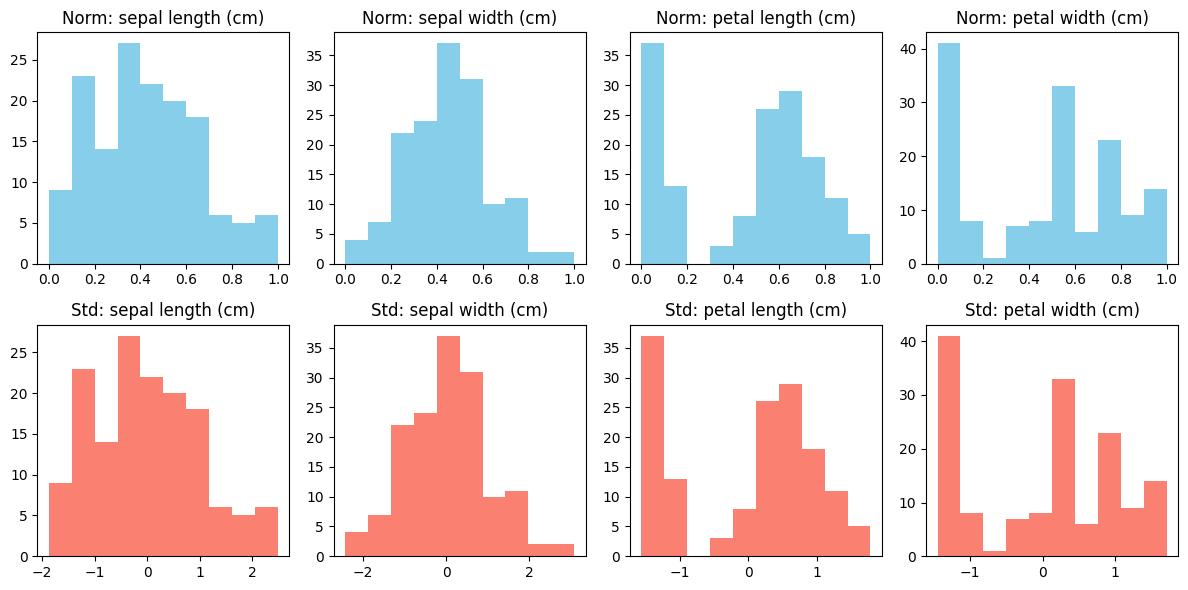

Raw Accuracy: 1.0000
Min-Max Normalized Accuracy: 0.9111
Z-score Standardized Accuracy: 1.0000

****************** Accuracy Comparison *****************
Raw Data Accuracy            : 1.0000
Min-Max Normalized Accuracy : 0.9111
Z-score Standardized Accuracy: 1.0000


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Step 1: Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

# Step 2: Min-Max Normalization
min_max_scaler = MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X)
minmax_df = pd.DataFrame(X_minmax, columns=feature_names)

# Step 3: Z-score Standardization
zscore_scaler = StandardScaler()
X_zscore = zscore_scaler.fit_transform(X)
zscore_df = pd.DataFrame(X_zscore, columns=feature_names)

# Step 4: Compare distributions with histograms
plt.figure(figsize=(12, 6))
for i in range(4):
    plt.subplot(2, 4, i+1)
    plt.hist(X_minmax[:, i], bins=10, color='skyblue')
    plt.title(f'Norm: {feature_names[i]}')

    plt.subplot(2, 4, i+5)
    plt.hist(X_zscore[:, i], bins=10, color='salmon')
    plt.title(f'Std: {feature_names[i]}')
plt.tight_layout()
plt.show()

# Step 5: Train and compare Logistic Regression models
def train_and_evaluate(X_data, label):
    X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.3, random_state=42)
    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{label} Accuracy: {acc:.4f}")
    return acc

# Run models
acc_raw = train_and_evaluate(X, "Raw")
acc_minmax = train_and_evaluate(X_minmax, "Min-Max Normalized")
acc_zscore = train_and_evaluate(X_zscore, "Z-score Standardized")

# Optional: Put results into a table
print("\n****************** Accuracy Comparison *****************")
print(f"Raw Data Accuracy            : {acc_raw:.4f}")
print(f"Min-Max Normalized Accuracy : {acc_minmax:.4f}")
print(f"Z-score Standardized Accuracy: {acc_zscore:.4f}")